In [1]:
from utils.DataFrameIO.casf_benchmark_result import get_ranking_power_benchmark
import matplotlib.pyplot as plt

In [2]:
def add(df, name, r, left, right):
    """
    add a row
    :param df:          dataframe
    :param name:        item name
    :param r:           spearman correlation
    :param left:        CI left bound
    :param right:       CI right bound
    :return:
    """
    df = df.append({"name": name, "r":r, "left_ci":left, "right_ci":right}, ignore_index=True).sort_values(by=["r"], ascending=True)
    return df

C:\Users\user\AppData\Local\Temp\ipykernel_2068\3724892314.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"name": name, "r":r, "left_ci":left, "right_ci":right}, ignore_index=True).sort_values(by=["r"], ascending=True)
C:\Users\user\AppData\Local\Temp\ipykernel_2068\3724892314.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"name": name, "r":r, "left_ci":left, "right_ci":right}, ignore_index=True).sort_values(by=["r"], ascending=True)


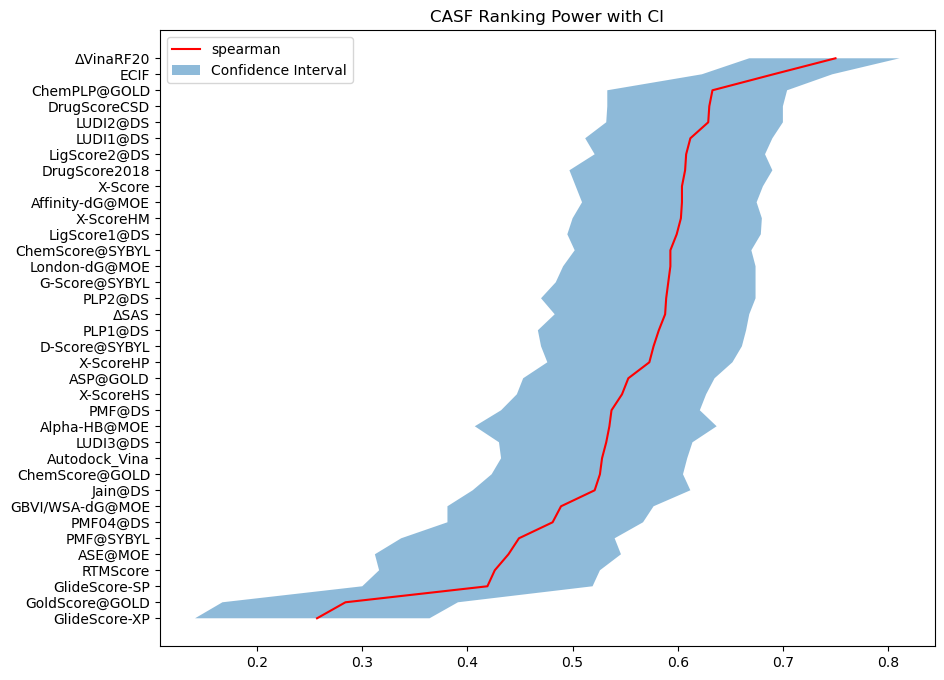

In [3]:
def CI_line():
    """

    :return:
    """
    data = get_ranking_power_benchmark().drop(columns=["kendall", "pi"])

    data = add(data, "ECIF", 0.691, 0.623, 0.747)
    data = add(data, "RTMScore", 0.426, 0.316, 0.526)

    plt.figure(figsize=(10,8))
    x = list(data["name"])
    left_ci = list(data["left_ci"].astype(float))
    right_ci = list(data["right_ci"].astype(float))
    spearman = list(data["r"].astype(float))
    plt.plot(spearman, x, color='r', label="spearman")
    plt.fill_betweenx(x, left_ci, right_ci, alpha=0.5, label="Confidence Interval")
    plt.legend()
    plt.title("CASF Ranking Power with CI")
    plt.show()


CI_line()

C:\Users\user\AppData\Local\Temp\ipykernel_2068\3724892314.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"name": name, "r":r, "left_ci":left, "right_ci":right}, ignore_index=True).sort_values(by=["r"], ascending=True)
C:\Users\user\AppData\Local\Temp\ipykernel_2068\3724892314.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"name": name, "r":r, "left_ci":left, "right_ci":right}, ignore_index=True).sort_values(by=["r"], ascending=True)


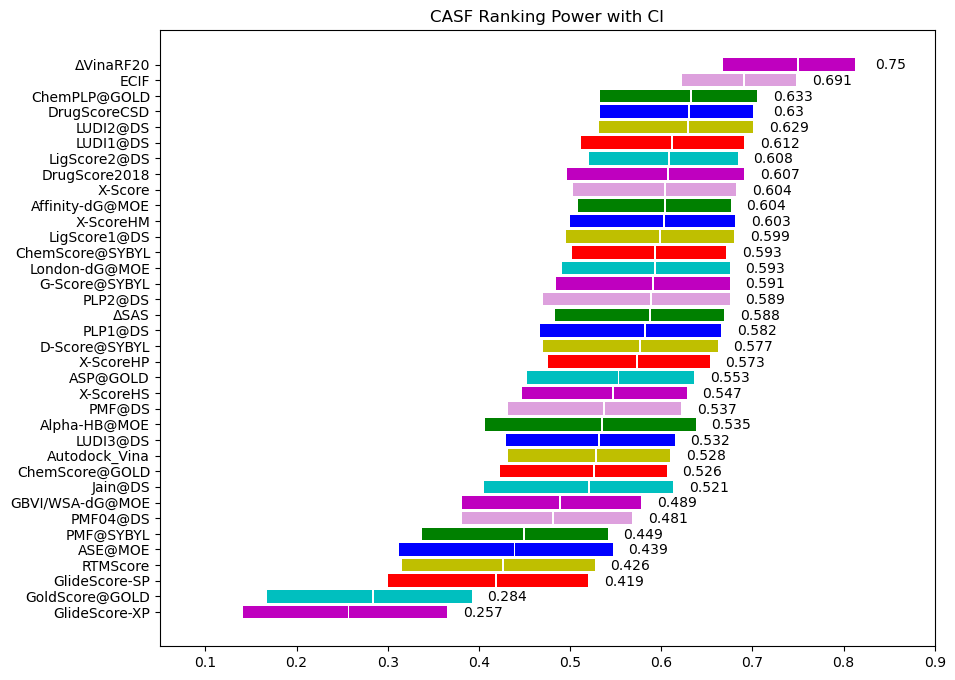

In [4]:
def CI_bar():
    """

    :return:
    """
    data = get_ranking_power_benchmark().drop(columns=["kendall", "pi"])

    data = add(data, "ECIF", 0.691, 0.623, 0.747)
    data = add(data, "RTMScore", 0.426, 0.316, 0.526)

    plt.figure(figsize=(10,8))
    x = list(data["name"])
    colors = ["m", "c", "r", "y", "b", "g", "plum"]
    left_ci = list(data["left_ci"].astype(float))
    right_ci = list(data["right_ci"].astype(float))
    spearman = list(data["r"].astype(float))
    plt.xlim(0.05, 0.9)
    for i in range(data.shape[0]):
        plt.barh(x[i], left=left_ci[i], width=spearman[i]-left_ci[i]-0.001, color=colors[i%len(colors)])
        rect = plt.barh(x[i], left=spearman[i]+0.001, width=right_ci[i]-spearman[i], color=colors[i%len(colors)])
        plt.text(right_ci[i] + 0.04, rect[0].get_y() - 0.1,  str(spearman[i]), ha='center', va='bottom')
    plt.title("CASF Ranking Power with CI")
    plt.show()


CI_bar()